In [ ]:
test_percentage = 0.2
num_test_samples = int(len(data) * test_percentage)

train = data.iloc[-num_test_samples: ]
test = data.iloc[-num_test_samples:]
predictors=["Open","High","Low",'Volume']

In [ ]:
import numpy as np
import pandas as pd
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

# Load your time series data here
# data = pd.read_csv('your_dataset.csv')

# Define the number of observations for testing
test_size = 30  # For example, using the last 30 days for testing

# Initialize variables to store best parameters and best error
best_params = None
best_error = float('inf')

# Define the range of hyperparameters to search
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Loop through different parameter combinations
for n_estimators in param_grid['n_estimators']:
    for max_depth in param_grid['max_depth']:
        for min_samples_split in param_grid['min_samples_split']:
            for min_samples_leaf in param_grid['min_samples_leaf']:
                errors = []  # To store errors for different test periods
                for i in range(2500, len(data), 50):
                    train_data = data[:i - test_size]  # Training data
                    test_data = data[i - test_size:i]  # Test data
                    # Prepare features and target
                    X_train = train_data[predictors]  # Replace with your features
                    y_train = train_data['Close']  # Replace with your target
                    X_test = test_data[predictors]
                    y_test = test_data['Close']
                    
                    # Create and train the model
                    model = RandomForestRegressor(n_estimators=n_estimators,
                                                  max_depth=max_depth,
                                                  min_samples_split=min_samples_split,
                                                  min_samples_leaf=min_samples_leaf)
                    model.fit(X_train, y_train)
                    
                    # Predict and calculate error
                    y_pred = model.predict(X_test)
                    error = mean_squared_error(y_test, y_pred)
                    errors.append(error)
                
                # Calculate average error for this parameter combination
                avg_error = np.mean(errors)
                
                # Update best_params and best_error if necessary
                if avg_error < best_error:
                    best_error = avg_error
                    best_params = {
                        'n_estimators': n_estimators,
                        'max_depth': max_depth,
                        'min_samples_split': min_samples_split,
                        'min_samples_leaf': min_samples_leaf
                    }




KeyboardInterrupt: 

In [ ]:
best_error=70.0682
print("Best Parameters:", best_params)
print("Best Mean Squared Error:", best_error)

In [ ]:
from sklearn.ensemble import RandomForestRegressor

model= RandomForestRegressor(n_estimators=200, max_depth= None, min_samples_split= 2, min_samples_leaf= 1)
model.fit(train[predictors],train['Close'])

RandomForestRegressor(n_estimators=200)

In [ ]:
preds=model.predict(test[predictors])

In [ ]:
from sklearn import metrics
import numpy as np

print("Mean Absolute Error:", round(metrics.mean_absolute_error(test["Close"], preds), 4))
print("Mean Squared Error:", round(metrics.mean_squared_error(test["Close"], preds), 4))
print("Root Mean Squared Error:", round(np.sqrt(metrics.mean_squared_error(test["Close"], preds)), 4))
errors = abs(preds - test["Close"])
mape = 100 * (errors / test["Close"])
accuracy = 100 - np.mean(mape)
print('Accuracy:', round(accuracy, 2), '%.') 

Mean Absolute Error: 5.8945
Mean Squared Error: 64.5817
Root Mean Squared Error: 8.0363
Accuracy: 99.86 %.


In [ ]:
import pandas as pd
preds= pd.Series(preds, index=test.index,name="Predictions")
combined=pd.concat([test["Close"],preds],axis=1)

<AxesSubplot:xlabel='Date'>

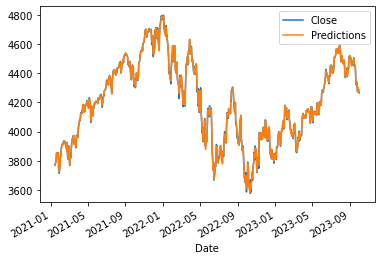

In [ ]:
combined.plot()

In [ ]:
combined

,Close,Predictions
Date,,
2021-01-15,3768.250000,3772.629796
2021-01-19,3798.909912,3798.607449
2021-01-20,3851.850098,3851.228065
2021-01-21,3853.070068,3854.336401
2021-01-22,3841.469971,3844.343579
...,...,...
2023-09-26,4273.529785,4277.620015
2023-09-27,4274.509766,4271.900464
2023-09-28,4299.700195,4297.685901


In [ ]:
combined['residuals'] = combined['Close'] - combined['Predictions']

high_risk_threshold = 3.0
moderate_risk_threshold = 2
low_risk_threshold = 1.0

def categorize_risk(residual):
    if abs(residual) > high_risk_threshold:
        return 'Very Risky'
    elif abs(residual) > moderate_risk_threshold:
        return 'Risky'
    elif abs(residual) > low_risk_threshold:
        return 'Moderate Risk'
    else:
        return 'Low Risk'

combined['Risk Level'] = combined['residuals'].apply(categorize_risk)

combined.tail(8)

,Close,Predictions,residuals,Risk Level
Date,,,,
2023-09-21,4330.000000,4339.118267,-9.118267,Very Risky
2023-09-22,4320.060059,4327.093818,-7.033760,Very Risky
2023-09-25,4337.439941,4335.089924,2.350017,Risky
2023-09-26,4273.529785,4277.620015,-4.090229,Very Risky
2023-09-27,4274.509766,4271.900464,2.609302,Risky
2023-09-28,4299.700195,4297.685901,2.014294,Risky
2023-09-29,4288.049805,4291.785032,-3.735227,Very Risky
2023-10-02,4263.640137,4269.704536,-6.064399,Very Risky


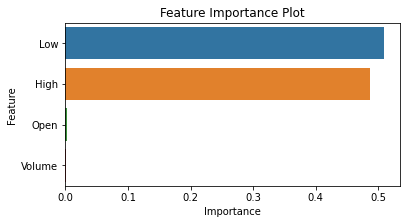

In [ ]:
# Get feature importances
feature_importances = model.feature_importances_
import seaborn as sns

# Create a DataFrame to store feature names and importances
feature_df = pd.DataFrame({'Feature': predictors, 'Importance': feature_importances})

# Sort the DataFrame by importance
feature_df = feature_df.sort_values(by='Importance', ascending=False)

# Create the feature importance plot
plt.figure(figsize=(6, 3))
sns.barplot(x='Importance', y='Feature', data=feature_df)
plt.title('Feature Importance Plot')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()